In [1]:
#import dependencies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

In [2]:
# add csv
salaries_df = pd.read_csv("./Resources/data_salaries_cleaned.csv")
salaries_df

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_size
0,2023,MI,FT,Data Scientist,150000,0,M
1,2023,MI,FT,Data Scientist,125000,0,M
2,2023,SE,FT,Data Scientist,150000,100,M
3,2023,SE,FT,Data Scientist,130000,100,M
4,2023,SE,FT,Data Engineer,190000,0,M
...,...,...,...,...,...,...,...
6743,2021,MI,FT,Applied Machine Learning Scientist,423000,50,L
6744,2021,SE,FT,Data Specialist,165000,100,L
6745,2020,SE,FT,Data Scientist,412000,100,L
6746,2021,MI,FT,Principal Data Scientist,151000,100,L


In [3]:
# finding outliers
# Calculate IQR for the 'salary' column
Q1 = salaries_df['salary'].quantile(0.25)
Q3 = salaries_df['salary'].quantile(0.75)
IQR = Q3 - Q1
# Find outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = salaries_df.loc[(salaries_df['salary'] < lower_bound) | (salaries_df['salary'] > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)


Outliers:
      work_year experience_level employment_type  \
32         2023               SE              FT   
183        2023               MI              FT   
203        2023               EX              FT   
337        2023               SE              FT   
341        2023               SE              FT   
...         ...              ...             ...   
6677       2021               MI              FT   
6711       2021               SE              FT   
6724       2020               EX              FT   
6743       2021               MI              FT   
6745       2020               SE              FT   

                               job_title    salary  remote_ratio company_size  
32                        Data Scientist    316000             0            M  
183                   Research Scientist    405000             0            L  
203             Director of Data Science    353200             0            M  
337                          AI Engineer    3

In [4]:
# Average salaries by remote work
remote_ratio_Average_salaries = salaries_df.groupby(["remote_ratio"])["salary"].mean()
remote_ratio_Average_salaries

# Average salaries by remote work & Job_Title
remote_ratio_job_title_Average_salaries = salaries_df.groupby(["job_title","remote_ratio"])["salary"].mean()
remote_ratio_job_title_Average_salaries

# Average salaries by remote work & year
remote_ratio_year_Average_salaries = salaries_df.groupby(["work_year","remote_ratio"])["salary"].mean()
remote_ratio_year_Average_salaries

# Average salaries by remote work & Job_Title & year
remote_ratio_job_title_year_Average_salaries = salaries_df.groupby(["work_year","job_title","remote_ratio"])["salary"].mean()
remote_ratio_job_title_year_Average_salaries






work_year  job_title               remote_ratio
2020       BI Data Analyst         0                98000.000000
           Big Data Engineer       100              70000.000000
           Business Data Analyst   0                95000.000000
                                   100             135000.000000
           Data Analyst            100              82666.666667
                                                       ...      
2023       Research Engineer       100             190621.428571
           Research Scientist      0               192212.662338
                                   50              220000.000000
                                   100             170246.923077
           Software Data Engineer  100             210000.000000
Name: salary, Length: 262, dtype: float64

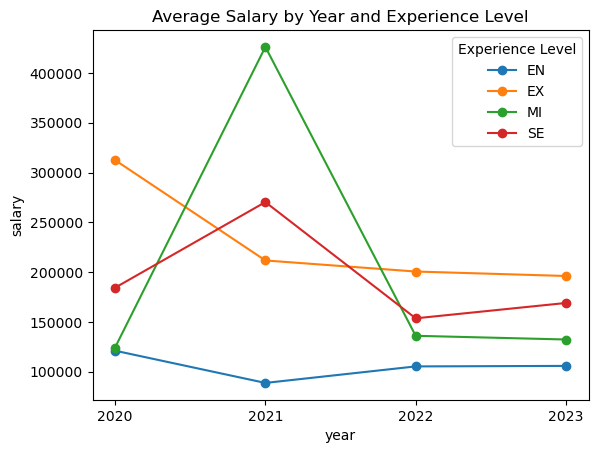

In [19]:
# Average salaries by experience_level yearly

# Group the data by year and experience_level
experience_level_yearly_Average_salaries = salaries_df[['work_year', 'experience_level','salary']].groupby(['work_year', 'experience_level']).mean().unstack()

# Plot the bar graph
#experience_level_yearly_Average_salaries.plot(kind='bar', y='salary')
experience_level_yearly_Average_salaries.plot(kind='line', y='salary', marker='o')

   
# Extract unique years from the DataFrame
years = salaries_df['work_year'].unique()


# Customize the plot
plt.title('Average Salary by Year and Experience Level')
plt.xlabel('year')
plt.ylabel('salary')
plt.legend(title='Experience Level')
plt.xticks(years)

# Show the plot
#plt.show()
plt.savefig('./AverageSalariesOutput/Average_Salary_by_Year_and_Experience_Level.png', bbox_inches='tight')

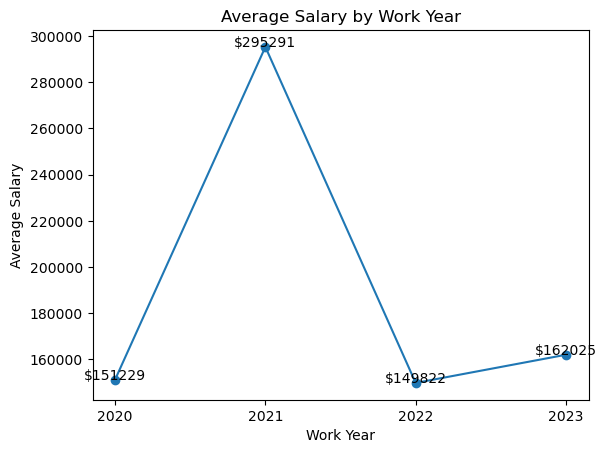

In [20]:
# Average salaries yearly
yearly_Average_salaries = salaries_df[['work_year','salary']].groupby(["work_year"]).mean()

# Plot the line graph
plt.plot(yearly_Average_salaries.index, yearly_Average_salaries['salary'], marker='o')

# Extract unique years from the DataFrame
years = salaries_df['work_year'].unique()

# Add text to each data point
for i, txt in enumerate(yearly_Average_salaries['salary']):
    plt.text(yearly_Average_salaries.index[i], txt, f'${txt:.0f}', ha='center')

# Customize the plot
plt.title('Average Salary by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.xticks(years)

# Show the plot
#plt.show()
plt.savefig('./AverageSalariesOutput/Average_Salary_by_Work_Year.png', bbox_inches='tight')

In [5]:
# Calculate average salary by job title
avg_salary_by_job_title = salaries_df.groupby('job_title')['salary'].mean()
avg_salary_by_job_title


job_title
AI Architect                       253600.000000
AI Developer                       184400.000000
AI Engineer                        188460.526316
AI Research Engineer               150000.000000
AI Scientist                       145000.000000
                                       ...      
Research Engineer                  191575.651376
Research Scientist                 189643.333333
Software Data Engineer             210000.000000
Staff Data Scientist               164000.000000
Staff Machine Learning Engineer    185000.000000
Name: salary, Length: 96, dtype: float64

In [18]:
salaries_df['job_title'].value_counts()

job_title
Data Engineer                         1645
Data Scientist                        1423
Data Analyst                          1026
Machine Learning Engineer              697
Applied Scientist                      225
                                      ... 
Software Data Engineer                   1
Compliance Data Analyst                  1
Business Intelligence Data Analyst       1
BI Data Engineer                         1
Principal Data Analyst                   1
Name: count, Length: 96, dtype: int64

                         job_title        salary
12                 BI Data Analyst  1.297222e+06
30             Data Analytics Lead  4.050000e+05
52          Data Science Tech Lead  3.750000e+05
83  Managing Director Data Science  3.000000e+05
68        Head of Machine Learning  2.590000e+05
5               AWS Data Architect  2.580000e+05
50            Data Science Manager  2.543203e+05
63        Director of Data Science  2.539189e+05
0                     AI Architect  2.536000e+05
21            Cloud Data Architect  2.500000e+05


C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


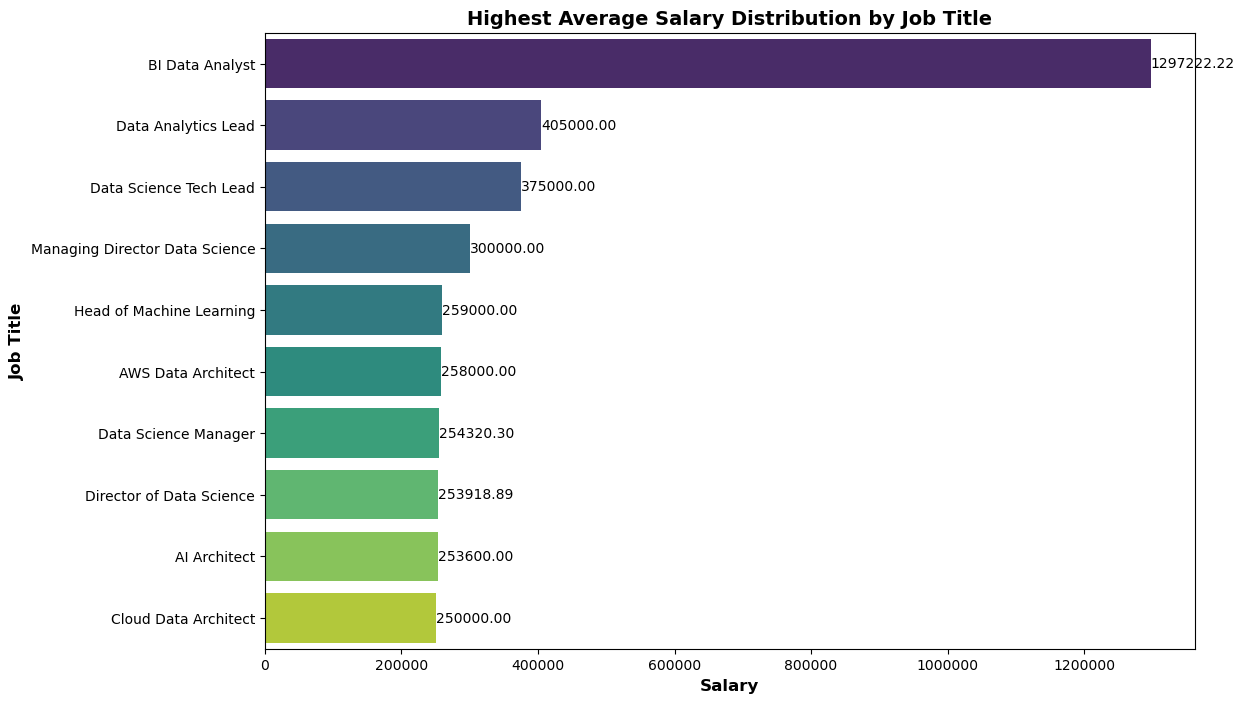

In [21]:
#for bar graph
avg_salary_by_job_title = salaries_df.groupby('job_title')['salary'].mean().reset_index()
avg_salary_by_job_title_sorted = avg_salary_by_job_title.sort_values('salary', ascending=False).head(10)
print(avg_salary_by_job_title_sorted )
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='salary', y='job_title', data=avg_salary_by_job_title_sorted, palette='viridis')

# Round the average salary to two decimal places
for p in ax.patches:
    salary = p.get_width()
    ax.annotate(f'{salary:.2f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
ax.xaxis.set_major_formatter('{x:.0f}')    
plt.title('Highest Average Salary Distribution by Job Title', fontsize=14, fontweight='bold')
plt.xlabel('Salary', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')
#plt.show()
plt.savefig('./AverageSalariesOutput/Highest_Average_Salary_Distribution_by_Job_Title.png', bbox_inches='tight')

                               job_title    salary
45            Data Operations Specialist  55355.00
37           Data Integration Specialist  56512.50
78  Machine Learning Operations Engineer  60000.00
24               Compliance Data Analyst  60000.00
13                      BI Data Engineer  60000.00
15                     Big Data Engineer  70000.00
26     Computer Vision Software Engineer  75500.00
46                  Data Quality Analyst  84370.00
42               Data Operations Analyst  88498.75
32             Data Analytics Specialist  95000.00


C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


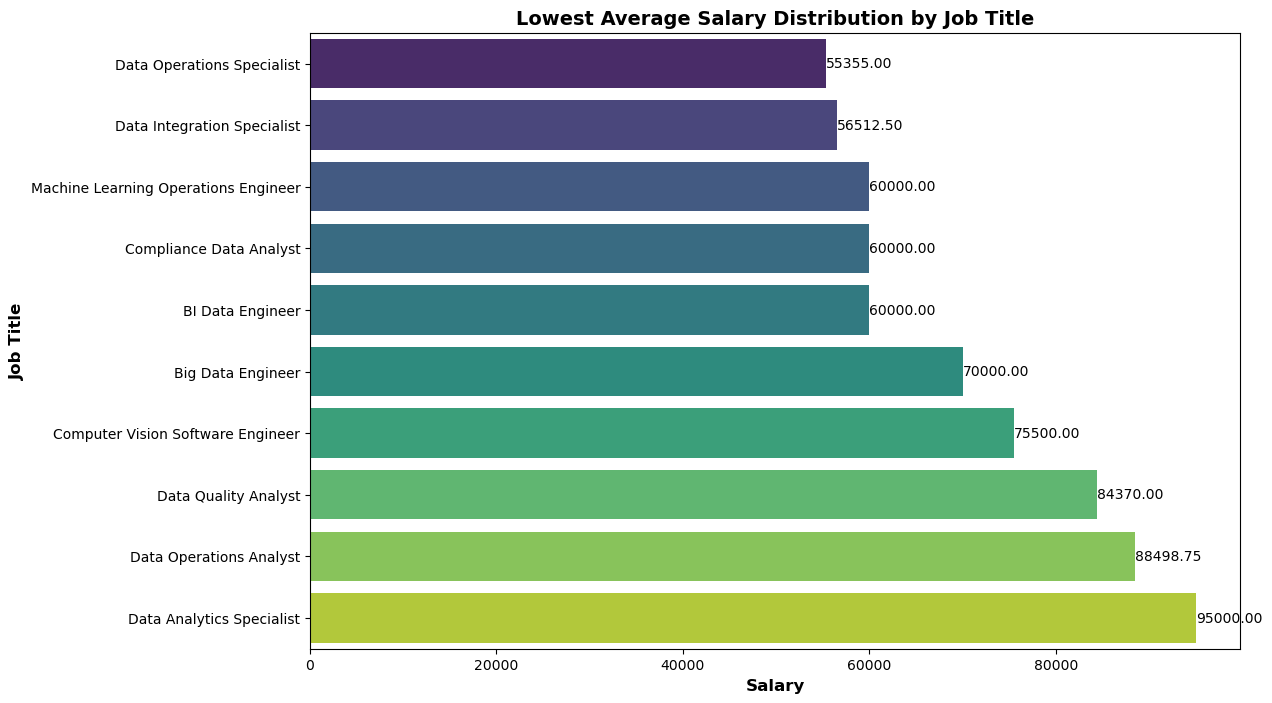

In [22]:
avg_salary_by_job_title_sorted_asc = avg_salary_by_job_title.sort_values('salary', ascending=True).head(10)
print(avg_salary_by_job_title_sorted_asc)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='salary', y='job_title', data=avg_salary_by_job_title_sorted_asc, palette='viridis')
# Round the average salary to two decimal places
for p in ax.patches:
    salary = p.get_width()
    ax.annotate(f'{salary:.2f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
ax.xaxis.set_major_formatter('{x:.0f}')    
plt.title('Lowest Average Salary Distribution by Job Title', fontsize=14, fontweight='bold')
plt.xlabel('Salary', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')
#plt.show()
plt.savefig('./AverageSalariesOutput/Lowest_Average_Salary_Distribution_by_Job_Title.png', bbox_inches='tight')

In [8]:
# Calculate the average salary by job title while removing outliers
salary_jobtitle_outliers = salaries_df[["work_year","job_title","salary"]]
for job_title, group in salary_jobtitle_outliers.groupby('job_title'):
    Q1 = group['salary'].quantile(0.25)
    Q3 = group['salary'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    group_no_outliers = group[(group['salary'] > lower_bound) & (group['salary'] < upper_bound)]
    salary_jobtitle_outliers = pd.concat([salary_jobtitle_outliers, group_no_outliers])
    
print(salary_jobtitle_outliers)


      work_year           job_title  salary
0          2023      Data Scientist  150000
1          2023      Data Scientist  125000
2          2023      Data Scientist  150000
3          2023      Data Scientist  130000
4          2023       Data Engineer  190000
...         ...                 ...     ...
5736       2022  Research Scientist  196000
6247       2022  Research Scientist  145000
6621       2022  Research Scientist  120000
6634       2022  Research Scientist  144000
6727       2021  Research Scientist   50000

[13334 rows x 3 columns]


                         job_title         salary
12                 BI Data Analyst  726470.588235
30             Data Analytics Lead  405000.000000
52          Data Science Tech Lead  375000.000000
83  Managing Director Data Science  300000.000000
68        Head of Machine Learning  259000.000000
5               AWS Data Architect  258000.000000
63        Director of Data Science  253918.888889
0                     AI Architect  253600.000000
21            Cloud Data Architect  250000.000000
66                    Head of Data  248568.421053


C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


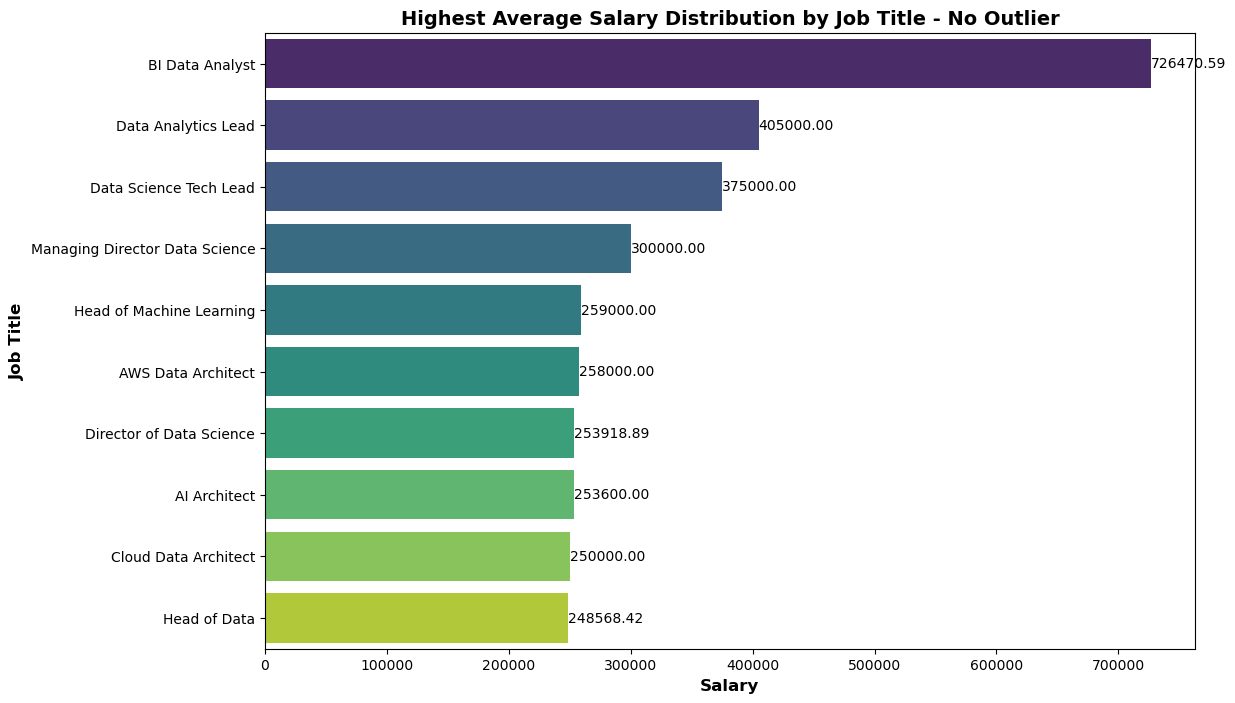

In [23]:
avg_salary_by_job_title_no_outlier_desc = salary_jobtitle_outliers.groupby('job_title')['salary'].mean().reset_index()
avg_salary_by_job_title_sorted_no_outlier_desc = avg_salary_by_job_title_no_outlier_desc.sort_values('salary', ascending=False).head(10)
print(avg_salary_by_job_title_sorted_no_outlier_desc )
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='salary', y='job_title', data=avg_salary_by_job_title_sorted_no_outlier_desc, palette='viridis')
# Round the average salary to two decimal places
for p in ax.patches:
    salary = p.get_width()
    ax.annotate(f'{salary:.2f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
ax.xaxis.set_major_formatter('{x:.0f}')    
plt.title('Highest Average Salary Distribution by Job Title - No Outlier', fontsize=14, fontweight='bold')
plt.xlabel('Salary', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')
#plt.show()
plt.savefig('./AverageSalariesOutput/Highest_Average_Salary_Distribution_by_Job_Title_-_No_Outlier.png', bbox_inches='tight')

                               job_title   salary
45            Data Operations Specialist  55355.0
37           Data Integration Specialist  56512.5
78  Machine Learning Operations Engineer  60000.0
24               Compliance Data Analyst  60000.0
13                      BI Data Engineer  60000.0
15                     Big Data Engineer  70000.0
26     Computer Vision Software Engineer  75500.0
42               Data Operations Analyst  84132.0
46                  Data Quality Analyst  84370.0
32             Data Analytics Specialist  95000.0


C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


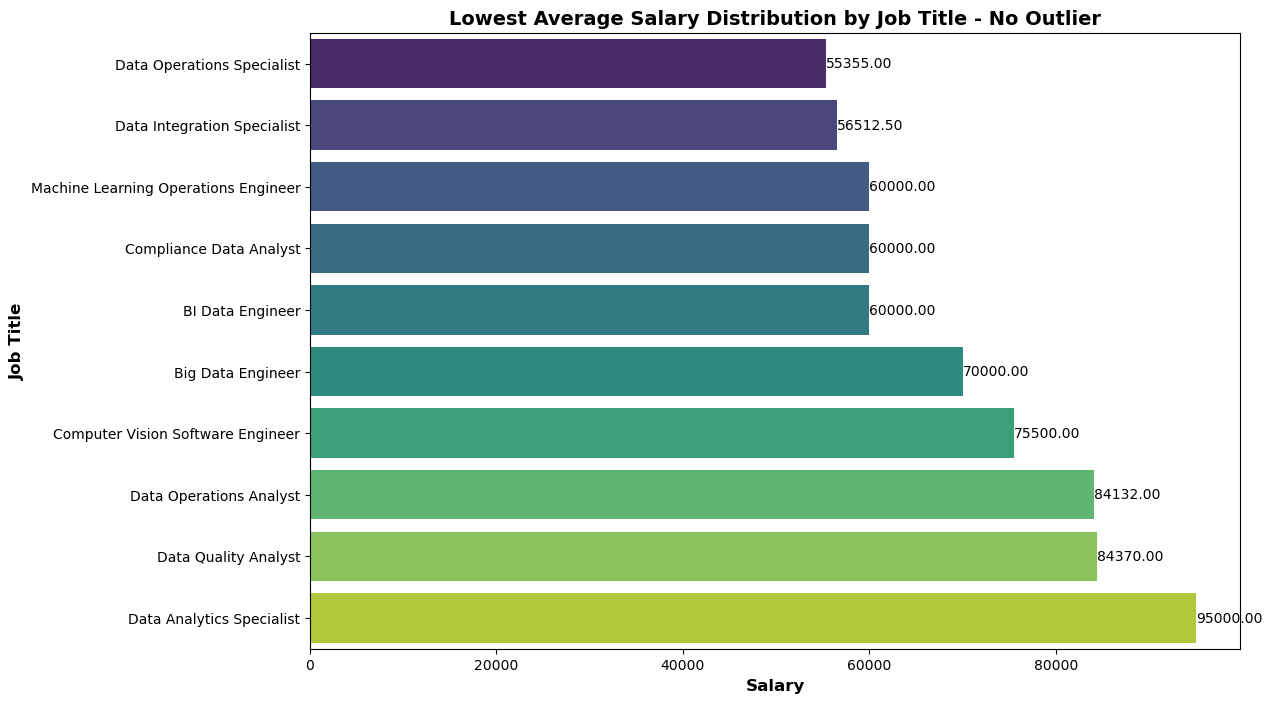

In [24]:
avg_salary_by_job_title_sorted_no_outlier_asc = avg_salary_by_job_title_no_outlier_desc.sort_values('salary', ascending=True).head(10)
print(avg_salary_by_job_title_sorted_no_outlier_asc)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='salary', y='job_title', data=avg_salary_by_job_title_sorted_no_outlier_asc, palette='viridis')
# Round the average salary to two decimal places
for p in ax.patches:
    salary = p.get_width()
    ax.annotate(f'{salary:.2f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
ax.xaxis.set_major_formatter('{x:.0f}')    
plt.title('Lowest Average Salary Distribution by Job Title - No Outlier', fontsize=14, fontweight='bold')
plt.xlabel('Salary', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')
#plt.show() 
plt.savefig('./AverageSalariesOutput/Lowest_Average_Salary_Distribution_by_Job_Title_-_No_Outlier.png', bbox_inches='tight')

In [14]:
# Save the DataFrame to a CSV file
#yearly_Average_salaries.to_csv('data.csv', index=False)

C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\conaekm\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


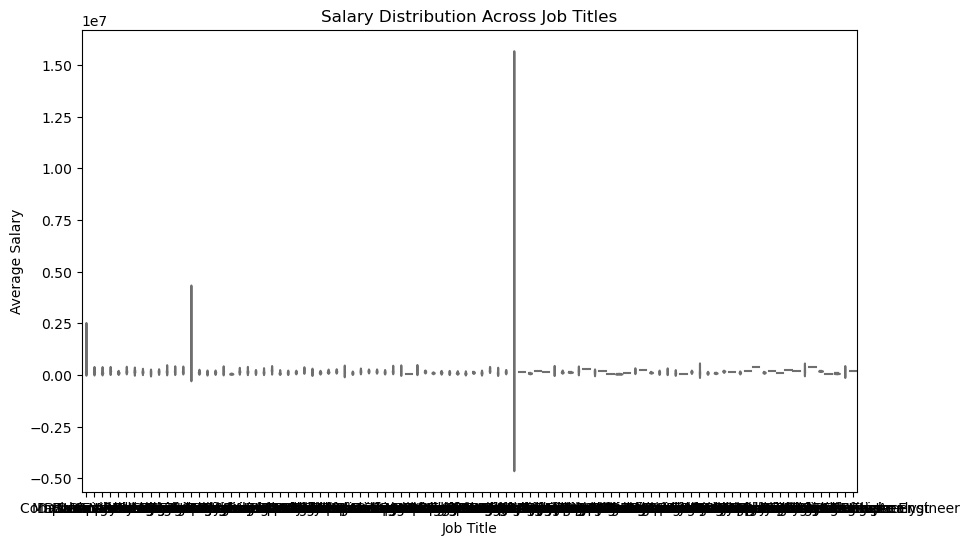

In [15]:
# Create a Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='job_title', y='salary', data=salaries_df[['job_title','salary']], inner='quartile', palette='pastel')
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.show()
